In [20]:
import pandas as pd

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [22]:
sample_submission.head()

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0


In [23]:
train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [25]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['_id'], axis=1)
    df_output = df_output.drop(['month'], axis=1)
    df_output = df_output.drop(['day_of_week'], axis=1)
    
    df_output = pd.get_dummies(df_output)
        
    return df_output

In [26]:
df_output = preproc_data(train)
df_output.head().T

,0,1,2,3,4
age,54.000,36.000,53.000,34.000,29.000
duration,87.000,291.000,182.000,180.000,6.000
campaign,1.000,1.000,1.000,2.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.400,1.100,1.400,1.100,-1.700
cons.price.idx,93.444,93.994,93.444,93.994,94.027
cons.conf.idx,-36.100,-36.400,-36.100,-36.400,-38.300
euribor3m,4.963,4.857,4.965,4.857,0.890
nr.employed,5228.100,5191.000,5228.100,5191.000,4991.600


In [27]:
y = df_output.target
X = df_output.drop(['target'], axis=1)

In [28]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
predict_proba_knn = knn.predict_proba(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)

(-0.01, 1.01)

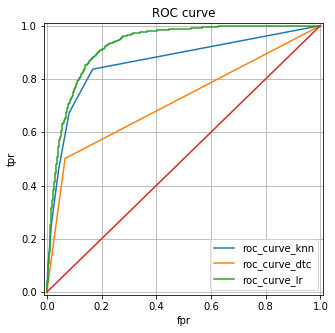

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, predict_proba_knn[:,1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])

plt.figure(figsize=(5, 5))

plt.plot(fpr_knn, tpr_knn, label='roc_curve_knn')
plt.plot(fpr_dtc, tpr_dtc, label='roc_curve_dtc')
plt.plot(fpr_lr, tpr_lr, label='roc_curve_lr')

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.legend()
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [31]:
print('roc_auc_score_knn', roc_auc_score(y_test, predict_proba_knn[:,1]))
print('roc_auc_score_dtc', roc_auc_score(y_test, predict_proba_dtc[:,1]))
print('roc_auc_score_lr', roc_auc_score(y_test, predict_proba_lr[:,1]))

roc_auc_score_knn 0.8629527120481477
roc_auc_score_dtc 0.7174083211842548
roc_auc_score_lr 0.925555231580128


In [36]:
preproc_test = preproc_data(test)
predict_proba_knn_test = knn.predict_proba(preproc_test)[:,1]
predict_proba_dtc_test = dtc.predict_proba(preproc_test)[:,1]
predict_proba_lr_test = lr.predict_proba(preproc_test)[:,1]
print(predict_proba_knn_test, predict_proba_dtc_test, predict_proba_lr_test)

[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.] [0.1481583  0.03202739 0.03598509 ... 0.00899267 0.01493631 0.00640997]


In [33]:
test_tmp = test.copy()
test_tmp['target'] = predict_proba_lr_test
submission = test_tmp[['_id', 'target']]
submission.head()

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.148158
1,ccac3879652b08cb8b44c1920fd93afa,0.032027
2,fcccab4d7a76f70647f015f2c84c2af8,0.035985
3,ed8399278c30678dab739045fa12b440,0.034692
4,1d4d62ac5cabcb48bac7112813f290cb,0.016078


In [34]:
submission.to_csv('sf04classification.csv', index=False)